In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

# Load the Data

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [3]:
def show_images(images, labels=None, class_names=None):
    if labels is None: labels = [None]*50
    for i, (im, lbl) in enumerate(zip(images[:50], labels[:50])):
        plt.subplot(5, 10, i+1)
        if lbl is not None:
            plt.title(lbl if class_names is None else class_names[lbl])
        plt.imshow(im, cmap='binary', interpolation='bilinear')
        plt.axis('off')
    plt.tight_layout()

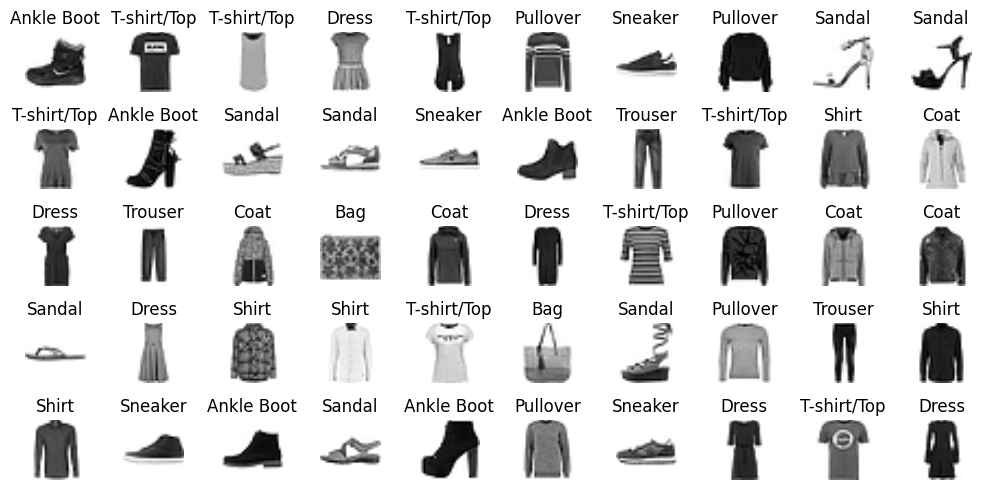

In [4]:
# TODO: Minimally explore the data
plt.figure(figsize=(10,5))
show_images(X_train_full, y_train_full, class_names)



In [5]:
# TODO: Split off validation set from training set, also divide by 255 to make all values from 0 to 1
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_train, X_valid, y_train, y_valid = X_train_full[:-5000], X_train_full[-5000:], y_train_full[:-5000], y_train_full[-5000:]

In [6]:
# TODO: Create the model and show the summary
tf.random.set_seed(42)  # set seed for reproducibility (sets TensorFlow, NumPy, and Python random seeds)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(300, activation='relu', name='hidden1'),
    tf.keras.layers.Dense(100, activation='relu', name='hidden2'),
    tf.keras.layers.Dense(10, activation='softmax', name='output'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# TODO: Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [8]:
# TODO: Fit the model to the training data
# Complete 20 epochs and show the validation scores
# Save the history (the return value) to a variable
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7468 - loss: 0.7072 - val_accuracy: 0.8212 - val_loss: 0.4683
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8527 - loss: 0.4030 - val_accuracy: 0.8592 - val_loss: 0.3894
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8687 - loss: 0.3552 - val_accuracy: 0.8628 - val_loss: 0.3730
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8798 - loss: 0.3246 - val_accuracy: 0.8654 - val_loss: 0.3662
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.3034 - val_accuracy: 0.8732 - val_loss: 0.3512
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8948 - loss: 0.2843 - val_accuracy: 0.8668 - val_loss: 0.3661
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8991 - loss: 0.2697 - val_accuracy: 0.8650 - val_loss: 0.3893
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9039 - loss: 0.2556 - 

(0.0, 1.0)

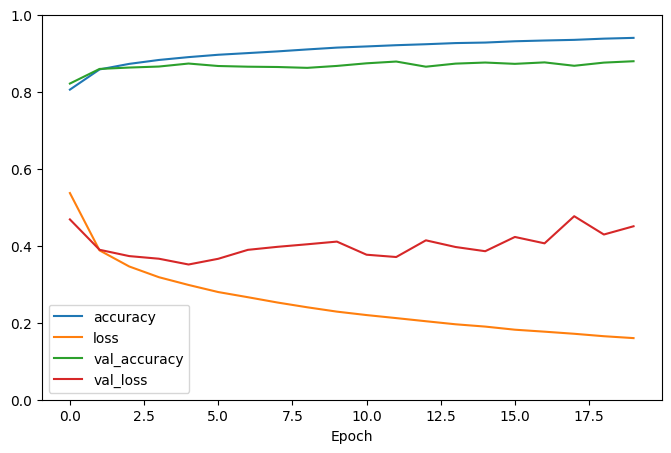

In [9]:
# TODO: Plot the training curves (loss and accuracy) of the training and validation sets (using the history)
pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.xlabel('Epoch')
plt.ylim([0, 1])

In [10]:
# TODO: Evaluate the testing performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss}, test accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8688 - loss: 0.4920
Test loss: 0.48365938663482666, test accuracy: 0.8684999942779541


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


<Axes: >

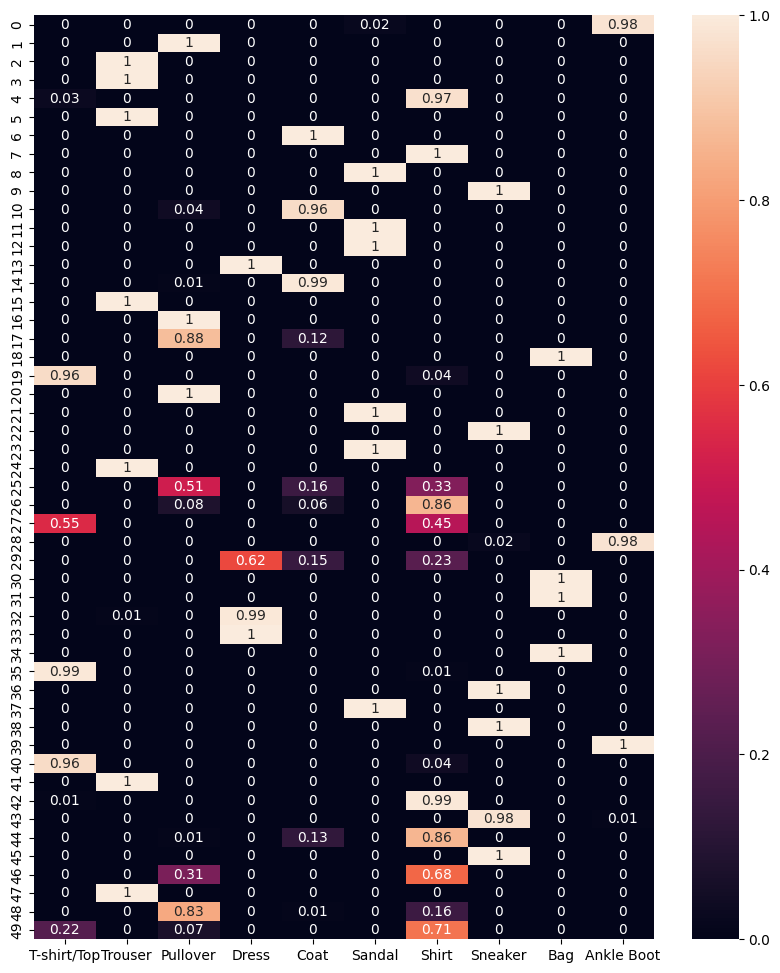

In [12]:
# TODO: Predict the results probabilities on the first 50 testing samples and show them using a heatmap
X_new = X_test[:50]
y_new_proba = model.predict(X_new)

plt.figure(figsize=(10, 12))
sns.heatmap(y_new_proba.round(2), annot=True, xticklabels=class_names)

['Ankle Boot, Pullover, Trouser, Trouser, Shirt, Trouser, Coat, Shirt, Sandal, Sneaker',
 'Coat, Sandal, Sneaker, Dress, Coat, Trouser, Pullover, Coat, Bag, T-shirt/Top',
 'Pullover, Sandal, Sneaker, Ankle Boot, Trouser, Coat, Shirt, T-shirt/Top, Ankle Boot, Dress',
 'Bag, Bag, Dress, Dress, Bag, T-shirt/Top, Sneaker, Sandal, Sneaker, Ankle Boot',
 'Shirt, Trouser, Dress, Sneaker, Shirt, Sneaker, Pullover, Trouser, Pullover, Pullover']

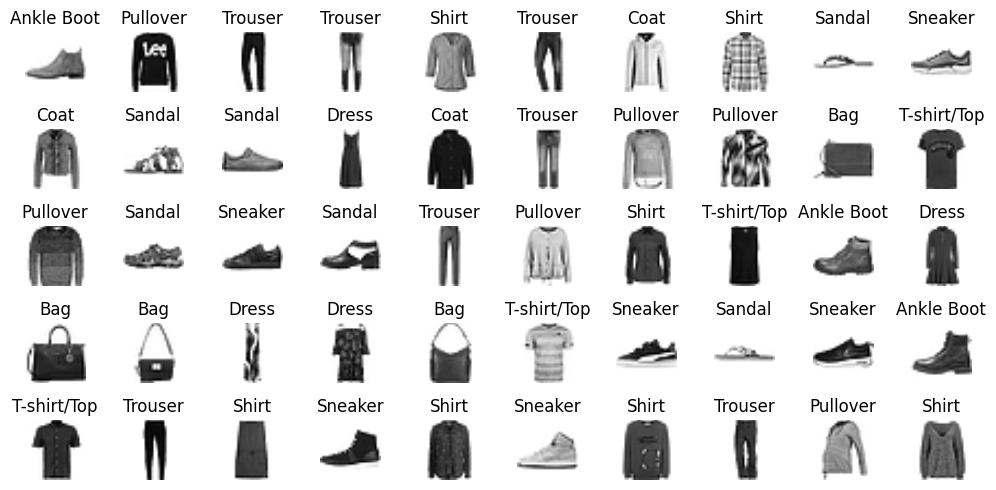

In [13]:
# TODO: Get the most likely predicted class for each then use show_images() to show the results
y_new = y_new_proba.argmax(axis=1)

plt.figure(figsize=(10,5))
show_images(X_new, y_new, class_names)

# The actual answers for the first 50
[', '.join(class_names[answer] for answer in y_test[i*10:(i+1)*10]) for i in range(5)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


<Axes: >

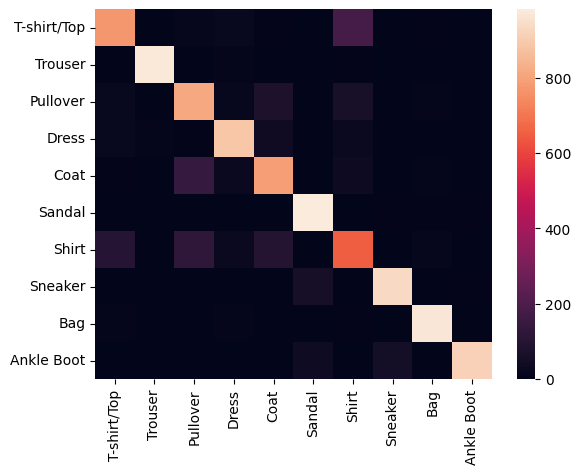

In [14]:
# TODO: View the confusion matrix of the validation set
cm = confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names)

<Axes: >

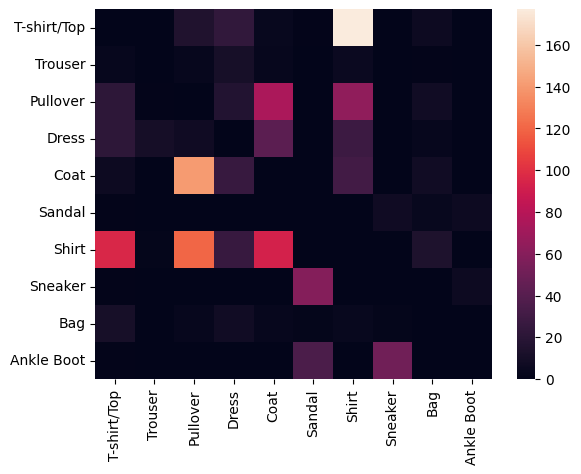

In [15]:
# Same thing but without the diagonal so we can see the errors in more detail
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)
sns.heatmap(cm_no_diag, xticklabels=class_names, yticklabels=class_names)

# Regression Model

In [16]:
# Load the California housing dataset, split into train, validation, and test sets
X, y = datasets.fetch_california_housing(return_X_y=True)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [17]:
X_train.shape

(11610, 8)

In [18]:
# TODO: Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Normalization(name='normalization'),
    tf.keras.layers.Dense(50, activation='relu', name='hidden1'),
    tf.keras.layers.Dense(50, activation='relu', name='hidden2'),
    tf.keras.layers.Dense(1, name='output'),
])

# TODO: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3),
              loss='mean_squared_error')

# Normalize the data
model.get_layer('normalization').adapt(X_train)

# TODO: Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7877 - val_loss: 0.3927
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.3956 - val_loss: 0.3882
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.3570 - val_loss: 0.3452
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.3313 - val_loss: 0.3318
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.3306 - val_loss: 0.3330
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.3151 - val_loss: 0.3202
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.3061 - val_loss: 0.3175
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.3034 - val_loss: 0.3221
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.2973 - val_loss: 0.3119
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.2910 - val_loss: 0.3126
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.2891 - val_loss: 0.3137
Epoch 12/20
363/363 ━━━━━━━━━━━━

(0.0, 0.75)

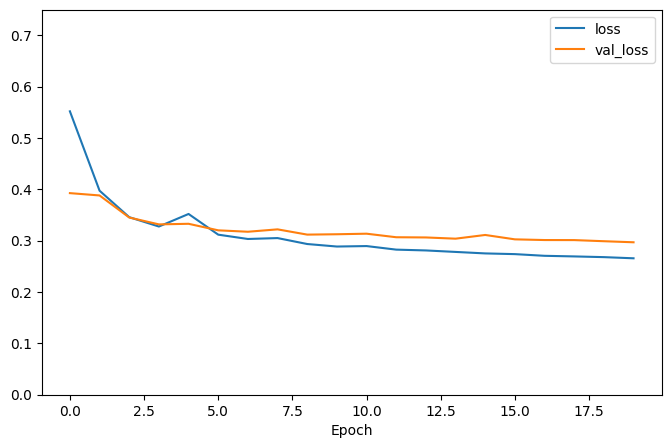

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylim([0, 0.75])

In [20]:
# TODO: Evaluate the test set (remember that the reported value will be loss metric, we probably want something slightly different)
test_loss = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.3034


In [21]:
# TODO: Get the predictions for the first 8 test samples and compare to the truth
X_new = X_test[:8]
y_pred = model.predict(X_new)
y_pred.round(3)[:, 0], y_test[:8]  # rounding to 3 places because original data is only to 3 places

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


(array([2.408, 3.444, 2.695, 0.658, 0.967, 2.854, 2.075, 1.039],
       dtype=float32),
 array([1.754, 2.988, 4.345, 1.104, 0.727, 2.714, 1.117, 0.841]))

# Deep and Wide Model

In [22]:
# TODO: Create the layers for the deep and wide model
norm = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30, activation='relu')
hidden2 = tf.keras.layers.Dense(30, activation='relu')
concat = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# TODO: Create the connections between the layers
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = norm(input_)
output = concat([normalized, hidden2(hidden1(normalized))])
output = output_layer(output)

# Create the model
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [23]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [24]:
# TODO: Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss='mean_squared_error')

# TODO: Adapt the normalizer to the training data
model.get_layer('normalization').adapt(X_train)

# TODO: Fit the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
 80/363 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 4.3559  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_10']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0875 - val_loss: 0.9444
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.9694 - val_loss: 0.7525
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.7637 - val_loss: 0.6879
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.6942 - val_loss: 0.6484
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.6406 - val_loss: 0.6135
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.6111 - val_loss: 0.5899
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.5858 - val_loss: 0.5686
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.5677 - val_loss: 0.5527
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.5520 - val_loss: 0.5387
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.5398 - val_loss: 0.5277
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.5293 - val_loss: 0.5183
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s

In [25]:
# TODO: Evaluate the test set (remember that the reported value will be loss metric, we probably want something slightly different)
test_loss = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.5106


# TensorBoard

In [28]:
%pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0
    Uninstalling pip-25.0:
      Successfully uninstalled pip-25.0
Note: you may need to restart the kernel to use updated packages.


In [29]:
# Make sure to install the tensorboard plugin for profiling along with loading the extension
%pip install -q -U tensorboard tensorboard-plugin-profile
%load_ext tensorboard

Note: you may need to restart the kernel to use updated packages.
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [30]:
# Sometimes the TensorBoard binary is not in the PATH, so we need to find it
# This may or may not work depending on your system
import os
def find_tensorboard():
    import shutil, os
    import tensorboard as tb
    if path := shutil.which('tensorboard'):
        return path
    parts = tb.__file__.split(os.path.sep)
    try:
        index = parts.index('lib')
    except ValueError:
        index = parts.index('lib64')
    path = os.path.sep.join(parts[:index] + ['bin', 'tensorboard'])
    if os.path.exists(path) and os.access(path, os.X_OK):
        return path
    raise ValueError("Could not find TensorBoard executable")
os.environ['TENSORBOARD_BINARY'] = find_tensorboard()

In [31]:
# Run tensorboard
# In VS Code, click the "Launch TensorBoard Session" button that shows up
# Otherwise you have to run this cell then open your browser to the correct webpage (http://localhost:6006/)
%tensorboard --port=6006 --logdir logs

In [32]:
# Create the TensorBoard callback
tensorboard_cb = tf.keras.callbacks.TensorBoard('logs', profile_batch=(100, 200))

2025-03-31 09:53:21.105817: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-03-31 09:53:21.105850: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-03-31 09:53:21.106198: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


In [36]:
# Fit the model with the TensorBoard callback
# Use call backs to save the best model and early stopping.
# Pass the list of callbacks to the fit method
# Use patience and restore best weights to save the best model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/500
275/363 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.3085

2025-03-31 10:04:00.721628: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-03-31 10:04:00.721645: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-03-31 10:04:00.799599: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2025-03-31 10:04:00.822050: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2025-03-31 10:04:00.822289: I external/local_xla/xla/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: logs/train/plugins/profile/2025_03_31_10_04_00/Giovannys-MacBook-Pro.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3095 - val_loss: 0.3364
Epoch 2/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.3097 - val_loss: 0.3361
Epoch 3/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.3092 - val_loss: 0.3360
Epoch 4/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.3092 - val_loss: 0.3358
Epoch 5/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.3087 - val_loss: 0.3357
Epoch 6/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.3087 - val_loss: 0.3354
Epoch 7/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.3082 - val_loss: 0.3353
Epoch 8/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.3082 - val_loss: 0.3351
Epoch 9/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.3077 - val_loss: 0.3350
Epoch 10/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.3076 - val_loss: 0.3347
Epoch 11/500
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.3072 - val_loss: 0.3346
Epoch 12/500
363/363 ━━━━━━━━━━━━